In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset='/content/drive/MyDrive/ML/outbreak_detect.csv'
import pandas as pd
df=pd.read_csv(dataset)


In [3]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,No
1,34,23,83.27,15.22,10717,677,Yes
2,40,23,50.74,0.00,1257,127,No
3,34,24,59.16,9.06,4198,211,No
4,34,27,73.23,0.00,11808,712,Yes
5,31,24,88.77,41.40,10881,648,Yes
6,33,24,77.94,23.88,8830,459,Yes
7,31,24,84.57,11.15,9693,482,No
8,36,24,53.40,2.12,9310,549,No
9,32,23,57.50,0.00,13154,838,Yes


In [4]:
df.shape


(23, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      23 non-null     int64  
 1   minTemp      23 non-null     int64  
 2   avgHumidity  23 non-null     float64
 3   Rainfall     23 non-null     float64
 4   Positive     23 non-null     int64  
 5   pf           23 non-null     int64  
 6   Outbreak     23 non-null     object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ KB


In [7]:
#Label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
df['Outbreak']=label_encoder.fit_transform(df['Outbreak'])

X=df.drop(['Outbreak'],axis=1)
Y=df['Outbreak']
print(X)
print(Y)

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf
0        29       18        49.74      0.00      2156  112
1        34       23        83.27     15.22     10717  677
2        40       23        50.74      0.00      1257  127
3        34       24        59.16      9.06      4198  211
4        34       27        73.23      0.00     11808  712
5        31       24        88.77     41.40     10881  648
6        33       24        77.94     23.88      8830  459
7        31       24        84.57     11.15      9693  482
8        36       24        53.40      2.12      9310  549
9        32       23        57.50      0.00     13154  838
10       34       18        59.40      0.00      2197  136
11       42       24        49.43      2.19      3362  213
12       45       32        34.74      0.38       416   26
13       43       28        69.07      4.65      7514  410
14       33       23        80.97      6.92     10990  390
15       32       24        87.32     11.92      6536  3

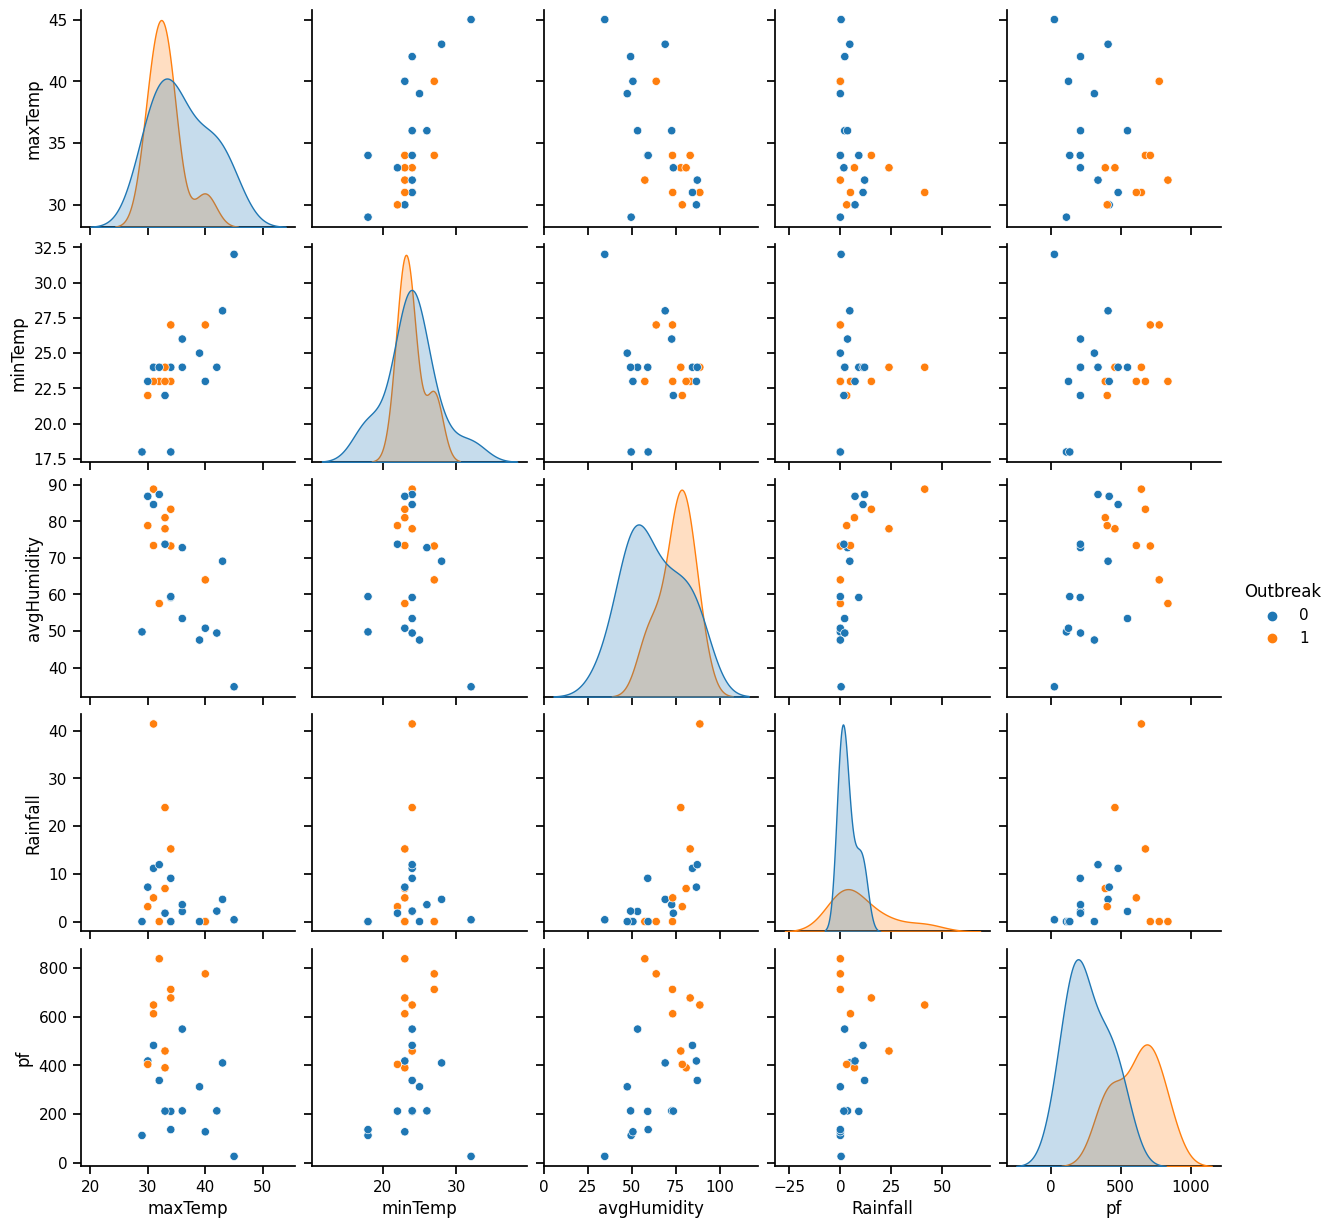

In [9]:
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['maxTemp','minTemp','avgHumidity','Rainfall','pf','Outbreak']],hue='Outbreak')

<Axes: >

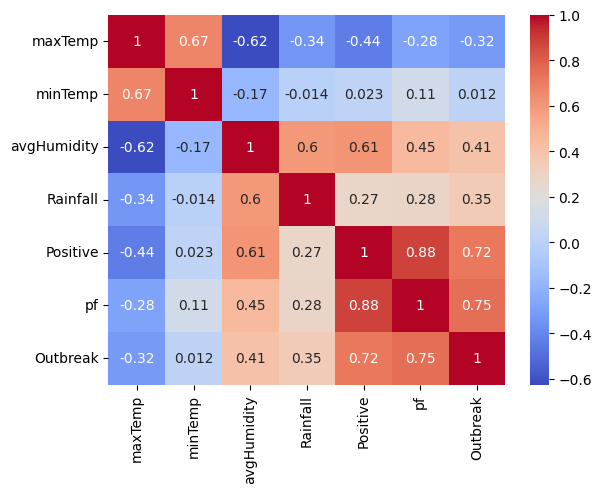

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['maxTemp','minTemp','avgHumidity','Rainfall','Positive','pf','Outbreak']
data=df[columns]
corelation_matrix=data.corr()

sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm')

In [12]:
Outbreak_corelations=corelation_matrix['Outbreak']

In [14]:
Outbreak_corelations_sorted=Outbreak_corelations.sort_values(ascending=False)

In [15]:
print(Outbreak_corelations_sorted)

Outbreak       1.000000
pf             0.746460
Positive       0.718892
avgHumidity    0.409802
Rainfall       0.347299
minTemp        0.012162
maxTemp       -0.319241
Name: Outbreak, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
count=df['Outbreak'].value_counts()
print(count)

0    14
1     9
Name: Outbreak, dtype: int64


In [40]:
Y_train.value_counts()

0    11
1     7
Name: Outbreak, dtype: int64

In [41]:
Y_test.value_counts()

0    3
1    2
Name: Outbreak, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X_train_balanced,Y_train_balanced=smote.fit_resample(X_train,Y_train)

In [43]:
Y_train.value_counts()

0    11
1     7
Name: Outbreak, dtype: int64

In [44]:
Y_test.value_counts()

0    3
1    2
Name: Outbreak, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [22]:
print(X_train_scaled.shape,X_test_scaled.shape,Y_train.shape,Y_test.shape)

(18, 6) (5, 6) (18,) (5,)


In [23]:
from sklearn.linear_model import LogisticRegression
lrmodel= LogisticRegression()

lrmodel.fit(X_train_scaled,Y_train)


LogisticRegression()

In [25]:
lrmodel.score(X_train_scaled,Y_train)

0.9444444444444444

In [26]:
lrmodel.score(X_test_scaled,Y_test)

0.6

In [27]:
X=sc.transform(X)

In [28]:
lrmodel.score(X,Y)

0.8695652173913043

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix for the training data")
cm1=confusion_matrix(Y_train,lrmodel.predict(X_train_scaled))
print(cm1)

Confusion Matrix for the training data
[[10  1]
 [ 0  7]]


In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix for the testing data")
cm1=confusion_matrix(Y_test,lrmodel.predict(X_test_scaled))
print(cm1)

Confusion Matrix for the testing data
[[3 0]
 [2 0]]


In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("confusion matrix for all data")
actual=Y
predicted=lrmodel.predict(X)
# type(actual)
# type(predicted)
cm1=confusion_matrix(actual,predicted)
print(cm1)

confusion matrix for all data
[[13  1]
 [ 2  7]]


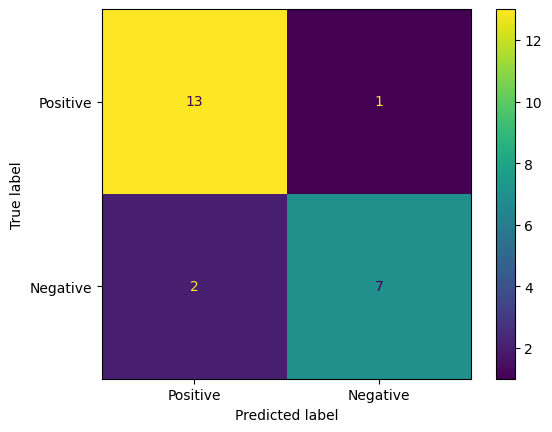

In [32]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm=metrics.confusion_matrix(actual,predicted)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Positive','Negative'])
cm_display.plot()

In [33]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.88      0.78      0.82         9

    accuracy                           0.87        23
   macro avg       0.87      0.85      0.86        23
weighted avg       0.87      0.87      0.87        23



In [34]:
coefficients=lrmodel.coef_
print(coefficients)

[[-0.1905093   0.08120969  0.16026937  0.53233181  0.89157729  1.35072058]]


In [36]:
intercept=lrmodel.intercept_
print(intercept)

[-1.12843001]


In [37]:
from sklearn.metrics import accuracy_score
Y_pred= lrmodel.predict(X_test_scaled)

In [38]:
acc=accuracy_score(Y_pred,Y_test)
print(acc)

0.6


In [45]:
import pandas as pd

new_data1 = pd.DataFrame({

    'maxTemp' : [34],

    'minTemp':[23],

    'avgHumidity':[83.27],

    'Rainfall':[15.22],

    'Positive':[10717],

    'pf':[677],

})

In [46]:
prediction = lrmodel.predict(new_data1[['maxTemp','minTemp','avgHumidity','Rainfall','Positive','pf']])

print(prediction[0])

print(f"Prediction: {'Will have Outbreak' if prediction[0]==1 else 'Will not have Outbreak'}")

1
Prediction: Will have Outbreak


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
